Found 2515 files belonging to 36 classes.
0.0
255.0
[23 30 22 13 11 16 15 15  7 33 32 28 35 16 13 24 24  7 24  8  9 33 28 21
 20 15  5  3  3 23  8 12]
0.0
1.0
Epoch 1/10
55/55 [==============================] - 37s 655ms/step - loss: 1.3368 - accuracy: 0.6227 - val_loss: 0.2918 - val_accuracy: 0.8945
Epoch 2/10
55/55 [==============================] - 34s 625ms/step - loss: 0.2673 - accuracy: 0.9040 - val_loss: 0.1401 - val_accuracy: 0.9473
Epoch 3/10
55/55 [==============================] - 36s 646ms/step - loss: 0.1503 - accuracy: 0.9517 - val_loss: 0.0907 - val_accuracy: 0.9707
Epoch 4/10
55/55 [==============================] - 35s 631ms/step - loss: 0.1041 - accuracy: 0.9699 - val_loss: 0.1152 - val_accuracy: 0.9648
Epoch 5/10
55/55 [==============================] - 35s 634ms/step - loss: 0.0651 - accuracy: 0.9790 - val_loss: 0.0804 - val_accuracy: 0.9785
Epoch 6/10
55/55 [==============================] - 35s 636ms/step - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.0368 - val_

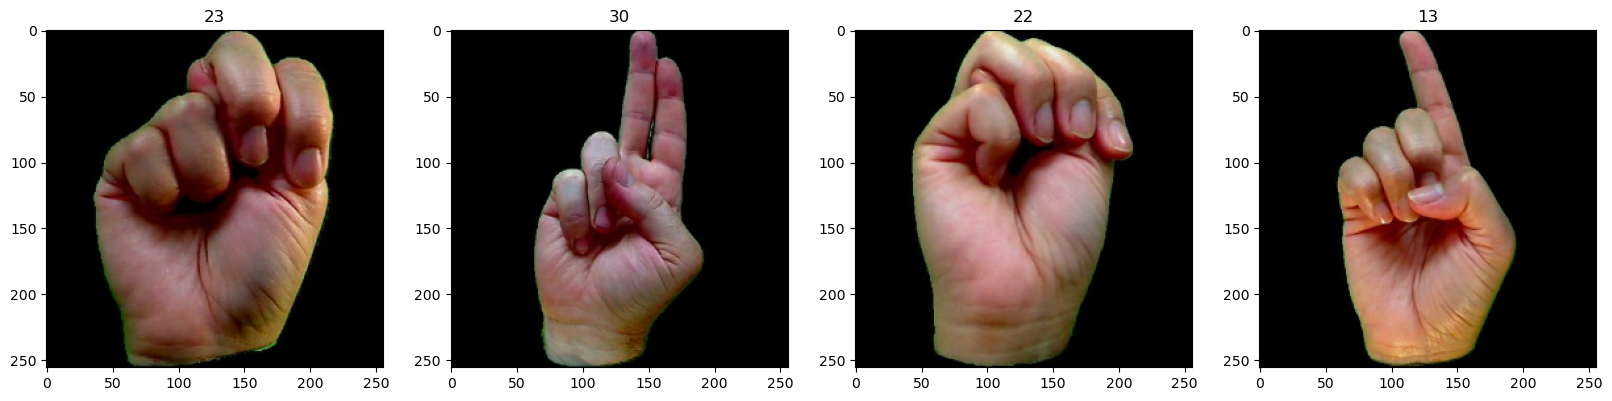

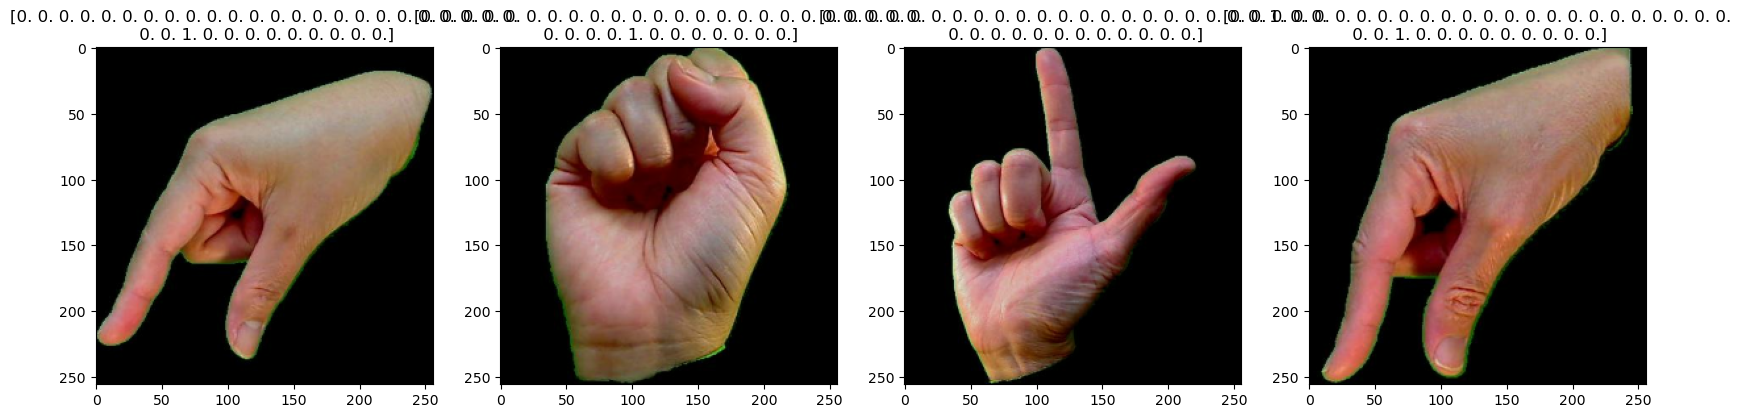

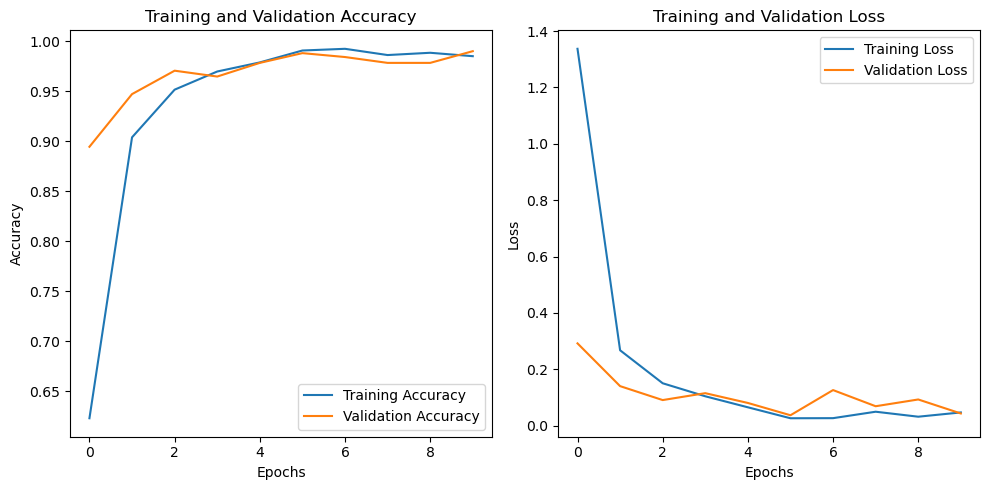

Test Loss: 0.17481233179569244
Test Accuracy: 0.9629629850387573


In [54]:
## Previous configuration

!pip install tensorflow opencv-python matplotlib

import tensorflow as tf
import os

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

## Load data

import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()

#batch[0]= img
#batch[1]= class
batch = data_iterator.next()
print(batch[0].min())
print(batch[0].max())
print(batch[1])

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Procces data

data = data.map(lambda x, y: (x / 255, tf.one_hot(y, num_classes))) #Normalize
scale_data_iterator = data.as_numpy_iterator()
batch = scale_data_iterator.next()
print(batch[0].min())
print(batch[0].max())

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

train_size = int(len(data)*.7) #Train 70%
val_size = int(len(data)*.2)+1 #Validation 20%
test_size = int(len(data)*.1)+1 #Test 10%
len(data)==train_size+val_size+test_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

input_shape = (256, 256, 3)
num_classes = 36

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output and add Dense layers
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Adding dropout for regularization

model.add(Dense(num_classes, activation='softmax'))  # Output layer with 36 neurons for 36 classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set the number of epochs
epochs = 10

# Calculate steps per epoch and validation steps based on batch sizes
train_steps = len(train)
val_steps = len(val)

# Train the model using fit() with your separate datasets
history = model.fit(train, epochs=epochs, steps_per_epoch=train_steps, validation_data=val, validation_steps=val_steps)

# Test the model on the test set
test_results = model.evaluate(test)

# Extracting the training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Printing test results
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])